## 看資料

In [44]:
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

iris = sb.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


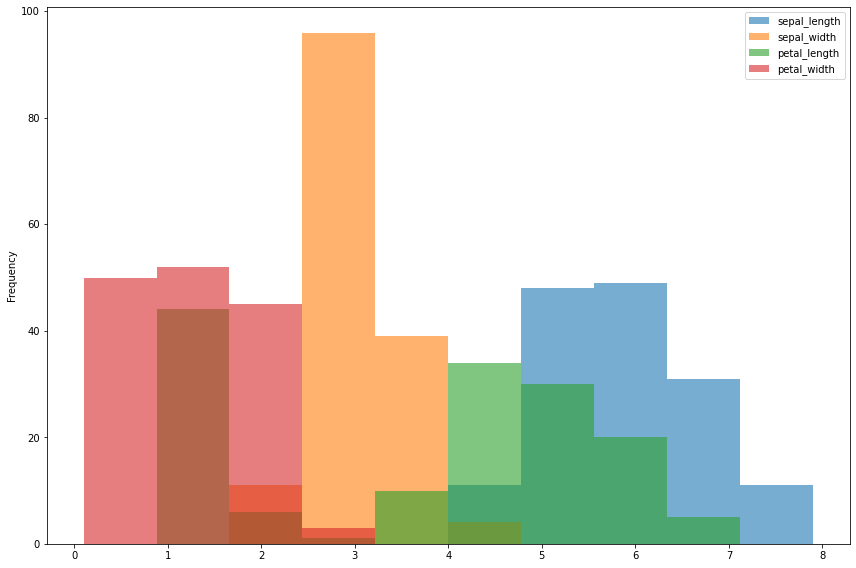

In [13]:
#hist-直方圖
iris.plot.hist(alpha=0.6, bins=10, figsize=(12,8), layout=(3,3))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

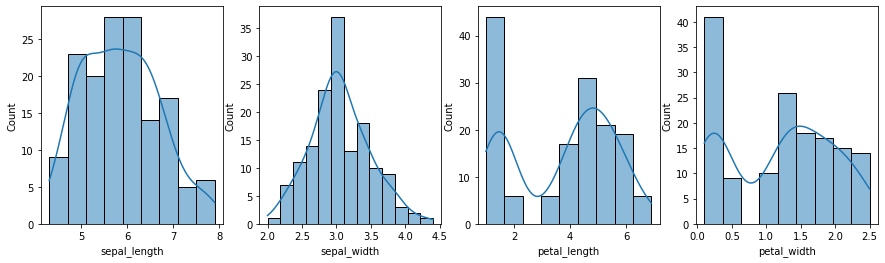

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4) #subplots-nrows*ncols
fig.set_size_inches(15,4)
sb.histplot(iris['sepal_length'],ax=axes[0],kde=True) #axes-位置
sb.histplot(iris['sepal_width'],ax=axes[1],kde=True) #kde-線
sb.histplot(iris['petal_length'],ax=axes[2],kde=True)
sb.histplot(iris['petal_width'],ax=axes[3],kde=True)

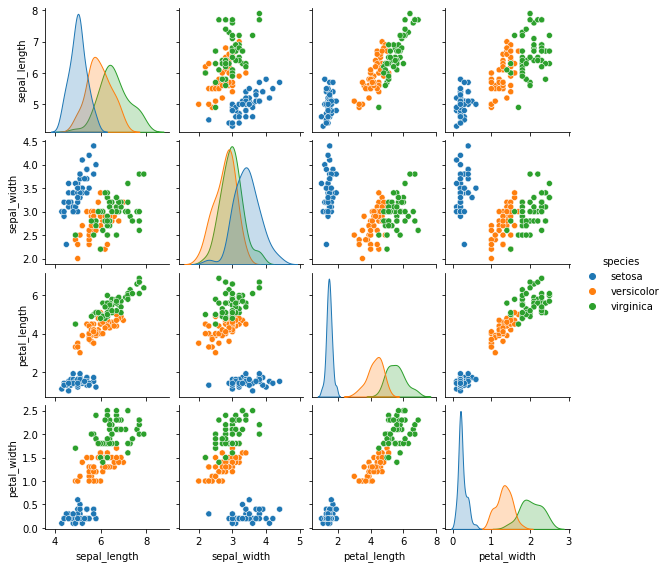

In [30]:
sb.pairplot(iris, hue='species', height=2, diag_kind='kde')
#pairplot-兩個特徵為一個pair

<AxesSubplot:>

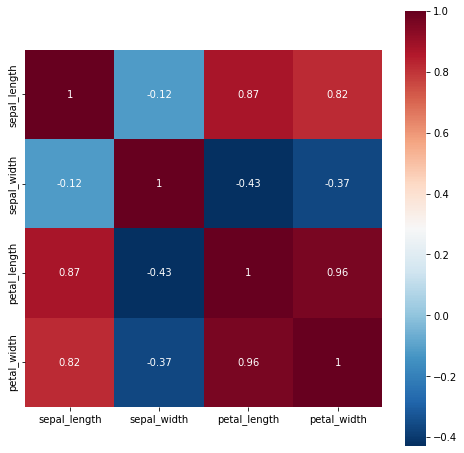

In [33]:
corr = iris[['sepal_length', 'sepal_width','petal_length', 
             'petal_width', 'species']].corr()
#corr-每個特徵彼此關聯程度
plt.figure(figsize=(8,8))
sb.heatmap(corr, square=True, annot=True, cmap='RdBu_r')

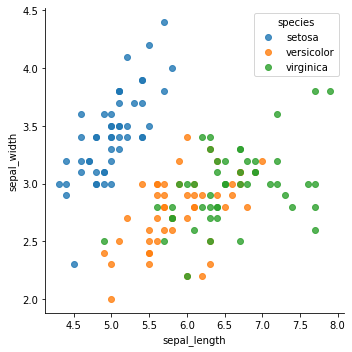

In [37]:
sb.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris, fit_reg=False, legend=False)
plt.legend(title='species', loc='upper right')
#lmplot 散佈圖

<AxesSubplot:ylabel='petal_width'>

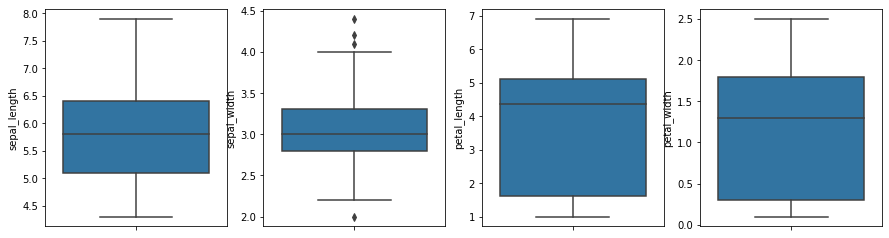

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15,4)
sb.boxplot(y=iris['sepal_length'],x=None,data=iris,ax=axes[0]) #boxplot 箱形圖
sb.boxplot(y=iris['sepal_width'],x=None,ax=axes[1]) 
sb.boxplot(y=iris['petal_length'],x=None,ax=axes[2])
sb.boxplot(y=iris['petal_width'],x=None,ax=axes[3])

## 清理資料

In [43]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

#導入iris array資料
iris = load_iris() 
iris_x = iris.data
iris_y = iris.target

#nan(not a number) -> 壞掉的值
len(np.where(np.isnan(iris_x))[0])

0

## 資料運算

In [54]:
#切資料（7 train, 3 test)
train_x, test_x, train_y, test_y = train_test_split(
    iris_x, iris_y, test_size=0.3, random_state=42, stratify=iris_y)
#random_state -> 固定隨機給出的值
#stratify -> 平均取各項特徵資料數量


#建 model
classifier = tree.DecisionTreeClassifier()
iris_clf_model = classifier.fit(train_x, train_y)

#predict
predict_y = iris_clf_model.predict(test_x)
print(predict_y)
print(test_y)


[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 2 2 1]
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]


In [56]:
from sklearn.metrics import confusion_matrix
import pandas as pd

pd.DataFrame(confusion_matrix(test_y, predict_y),columns=['一','二','三'])

,一,二,三
0,15,0,0
1,0,14,1
2,0,0,15
